This notebook contain the analysis, preprocessing and model training/evaluation of the ***Lung Cancer Prediction*** ( Air Pollution, Alcohol, Smoking & Risk of Lung Cancer) https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

-   This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking status, passive smoker status, chest pain, coughing of blood, fatigue levels, weight loss, shortness of breath, wheezing, swallowing difficulty, clubbing of finger nails, frequent colds, dry coughs, and snoring.

| Columns | Meaning |
| --- | --- |
| Age | The age of the patient. (Numeric) |
| Gender | The gender of the patient. (Categorical) |
| Air Pollution | The level of air pollution exposure of the patient. (Categorical) |
| Alcohol use | The level of alcohol use of the patient. (Categorical) |
| Dust Allergy | The level of dust allergy of the patient. (Categorical) |
| ccuPational Hazards | The level of occupational hazards of the patient. (Categorical) |
| Genetic Risk | The level of genetic risk of the patient. (Categorical) |
| chronic Lung Disease | The level of chronic lung disease of the patient. (Categorical) |
| Balanced Diet | The level of balanced diet of the patient. (Categorical) |
| Obesity | The level of obesity of the patient. (Categorical) |
| Smoking | The level of smoking of the patient. (Categorical) |
| Passive Smoker | The level of passive smoker of the patient. (Categorical) |
| Chest Pain | The level of chest pain of the patient. (Categorical) |
| Coughing of Blood | The level of coughing of blood of the patient. (Categorical) |
| Fatigue | The level of fatigue of the patient. (Categorical) |
| Weight Loss | The level of weight loss of the patient. (Categorical) |
| Shortness of Breath | The level of shortness of breath of the patient. (Categorical) |
| Wheezing | The level of wheezing of the patient. (Categorical) |
| Swallowing Difficulty | The level of swallowing difficulty of the patient. (Categorical) |
| Clubbing of Finger Nails | The level of clubbing of finger nails of the patient. (Categorical) |

-   The level of cancer severity column, is divided into three levels, `low`, `medium` and `high`. We'll analyze and develop a predictive method for the level of severity of the cancer. By analyzing this data we'll gain insight into what causes lung cancer and =============================

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB           
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.svm import SVC                          
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%matplotlib inline

In [130]:
df=pd.read_csv(r'C:\Users\Orjouwen\Desktop\pidev\PneumaTect\data\Lung Cancer Prediction\cancer patient data sets.csv')

In [132]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [134]:
df.drop("Patient Id", axis=1, inplace=True)
df.drop("index", axis=1, inplace=True)
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

display(df)

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [136]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                  

In [138]:
print('Cancer Levels: ', df['level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [140]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

,mean,std,min,25%,50%,75%,max
age,37.174,12.005,14.000,27.750,36.000,45.000,73.000
gender,1.402,0.491,1.000,1.000,1.000,2.000,2.000
air_pollution,3.840,2.030,1.000,2.000,3.000,6.000,8.000
alcohol_use,4.563,2.620,1.000,2.000,5.000,7.000,8.000
dust_allergy,5.165,1.981,1.000,4.000,6.000,7.000,8.000
occupational_hazards,4.840,2.108,1.000,3.000,5.000,7.000,8.000
genetic_risk,4.580,2.127,1.000,2.000,5.000,7.000,7.000
chronic_lung_disease,4.380,1.849,1.000,3.000,4.000,6.000,7.000
balanced_diet,4.491,2.136,1.000,2.000,4.000,7.000,7.000
obesity,4.465,2.125,1.000,3.000,4.000,7.000,7.000


In [142]:
df.shape

(1000, 24)

In [176]:
# Remove exact duplicates
dedup_data = df.drop_duplicates()
print(f"Unique samples remaining: {len(dedup_data)}/{len(df)}")
df = df.drop_duplicates()

Unique samples remaining: 152/1000


In [178]:
df.isnull().sum()

age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

In [180]:
# Showing data
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


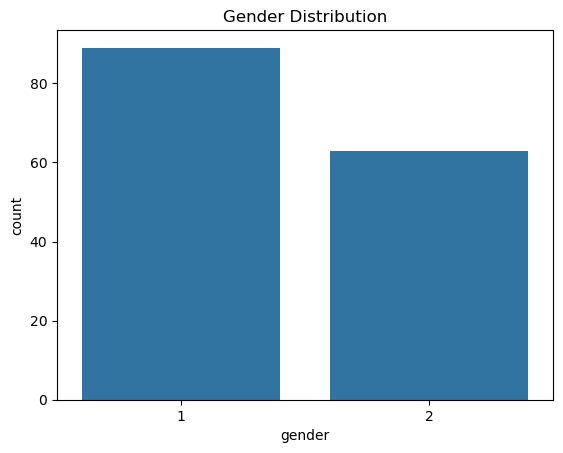

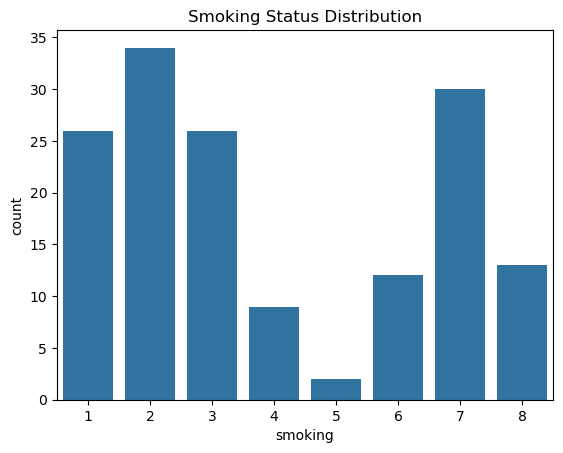

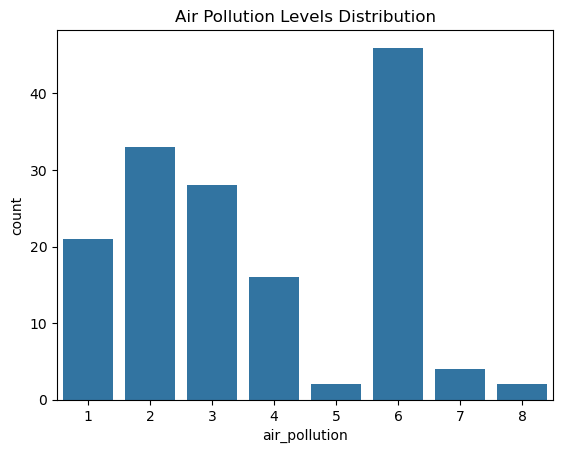

In [182]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='smoking', data=df)
plt.title('Smoking Status Distribution')
plt.show()

sns.countplot(x='air_pollution', data=df)
plt.title('Air Pollution Levels Distribution')
plt.show()

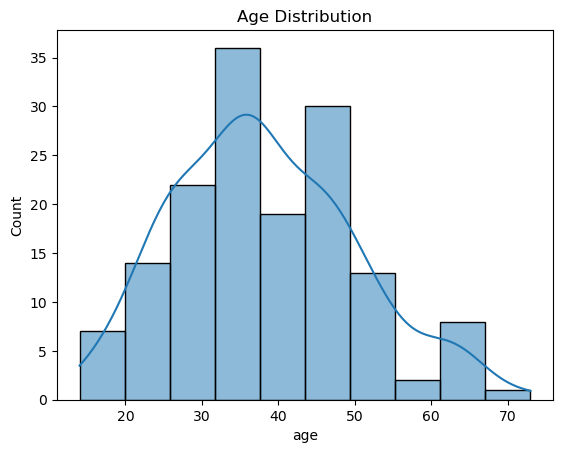

In [184]:
sns.histplot(df['age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.show()

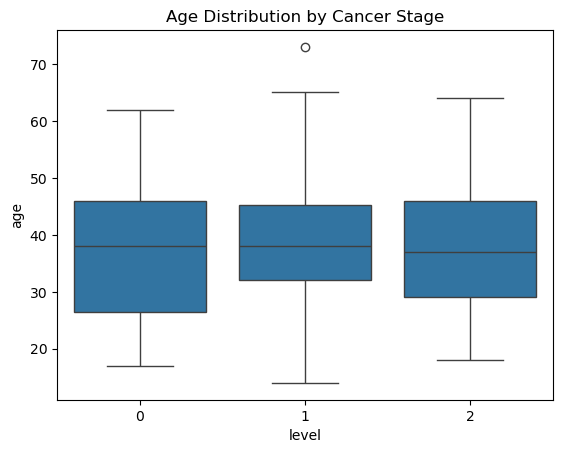

In [186]:
sns.boxplot(x='level', y='age', data=df)
plt.title('Age Distribution by Cancer Stage')
plt.show()

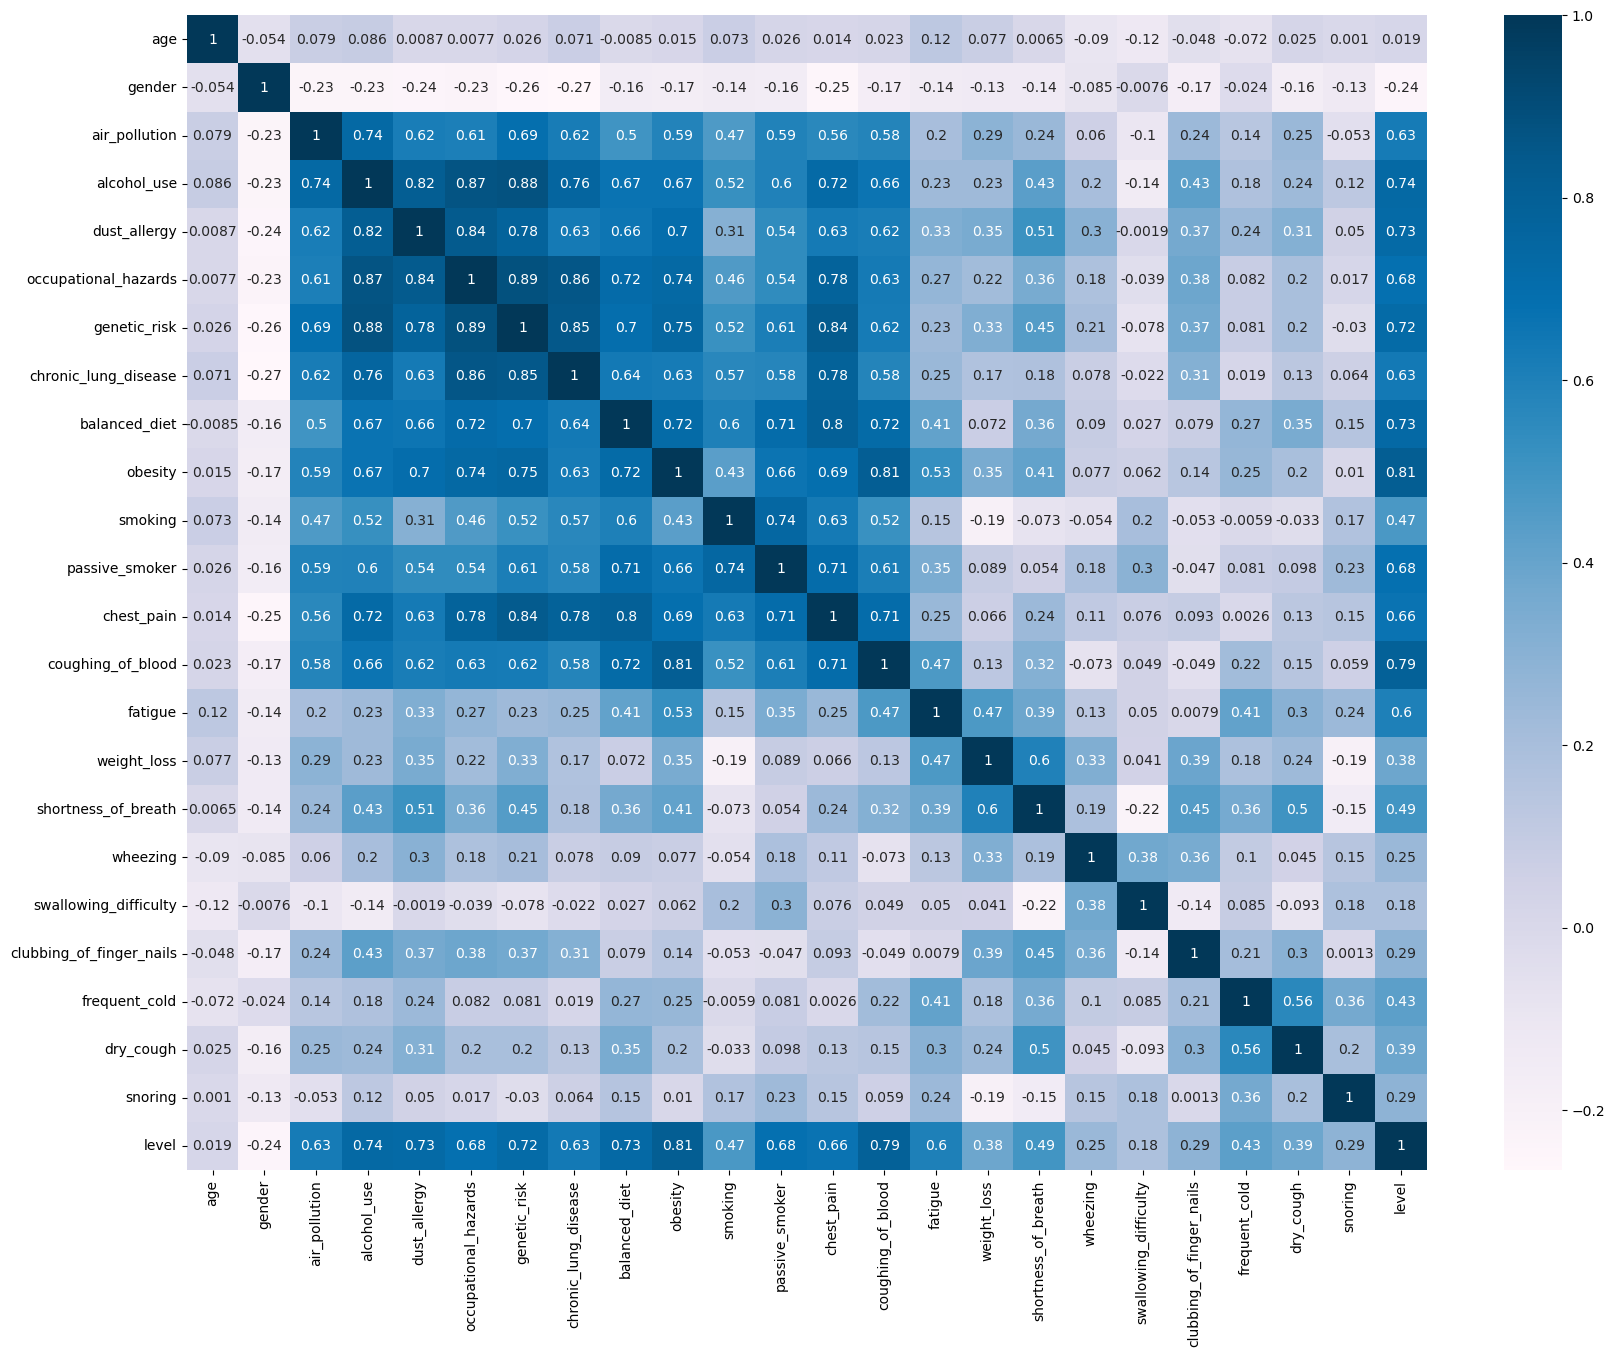

In [188]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

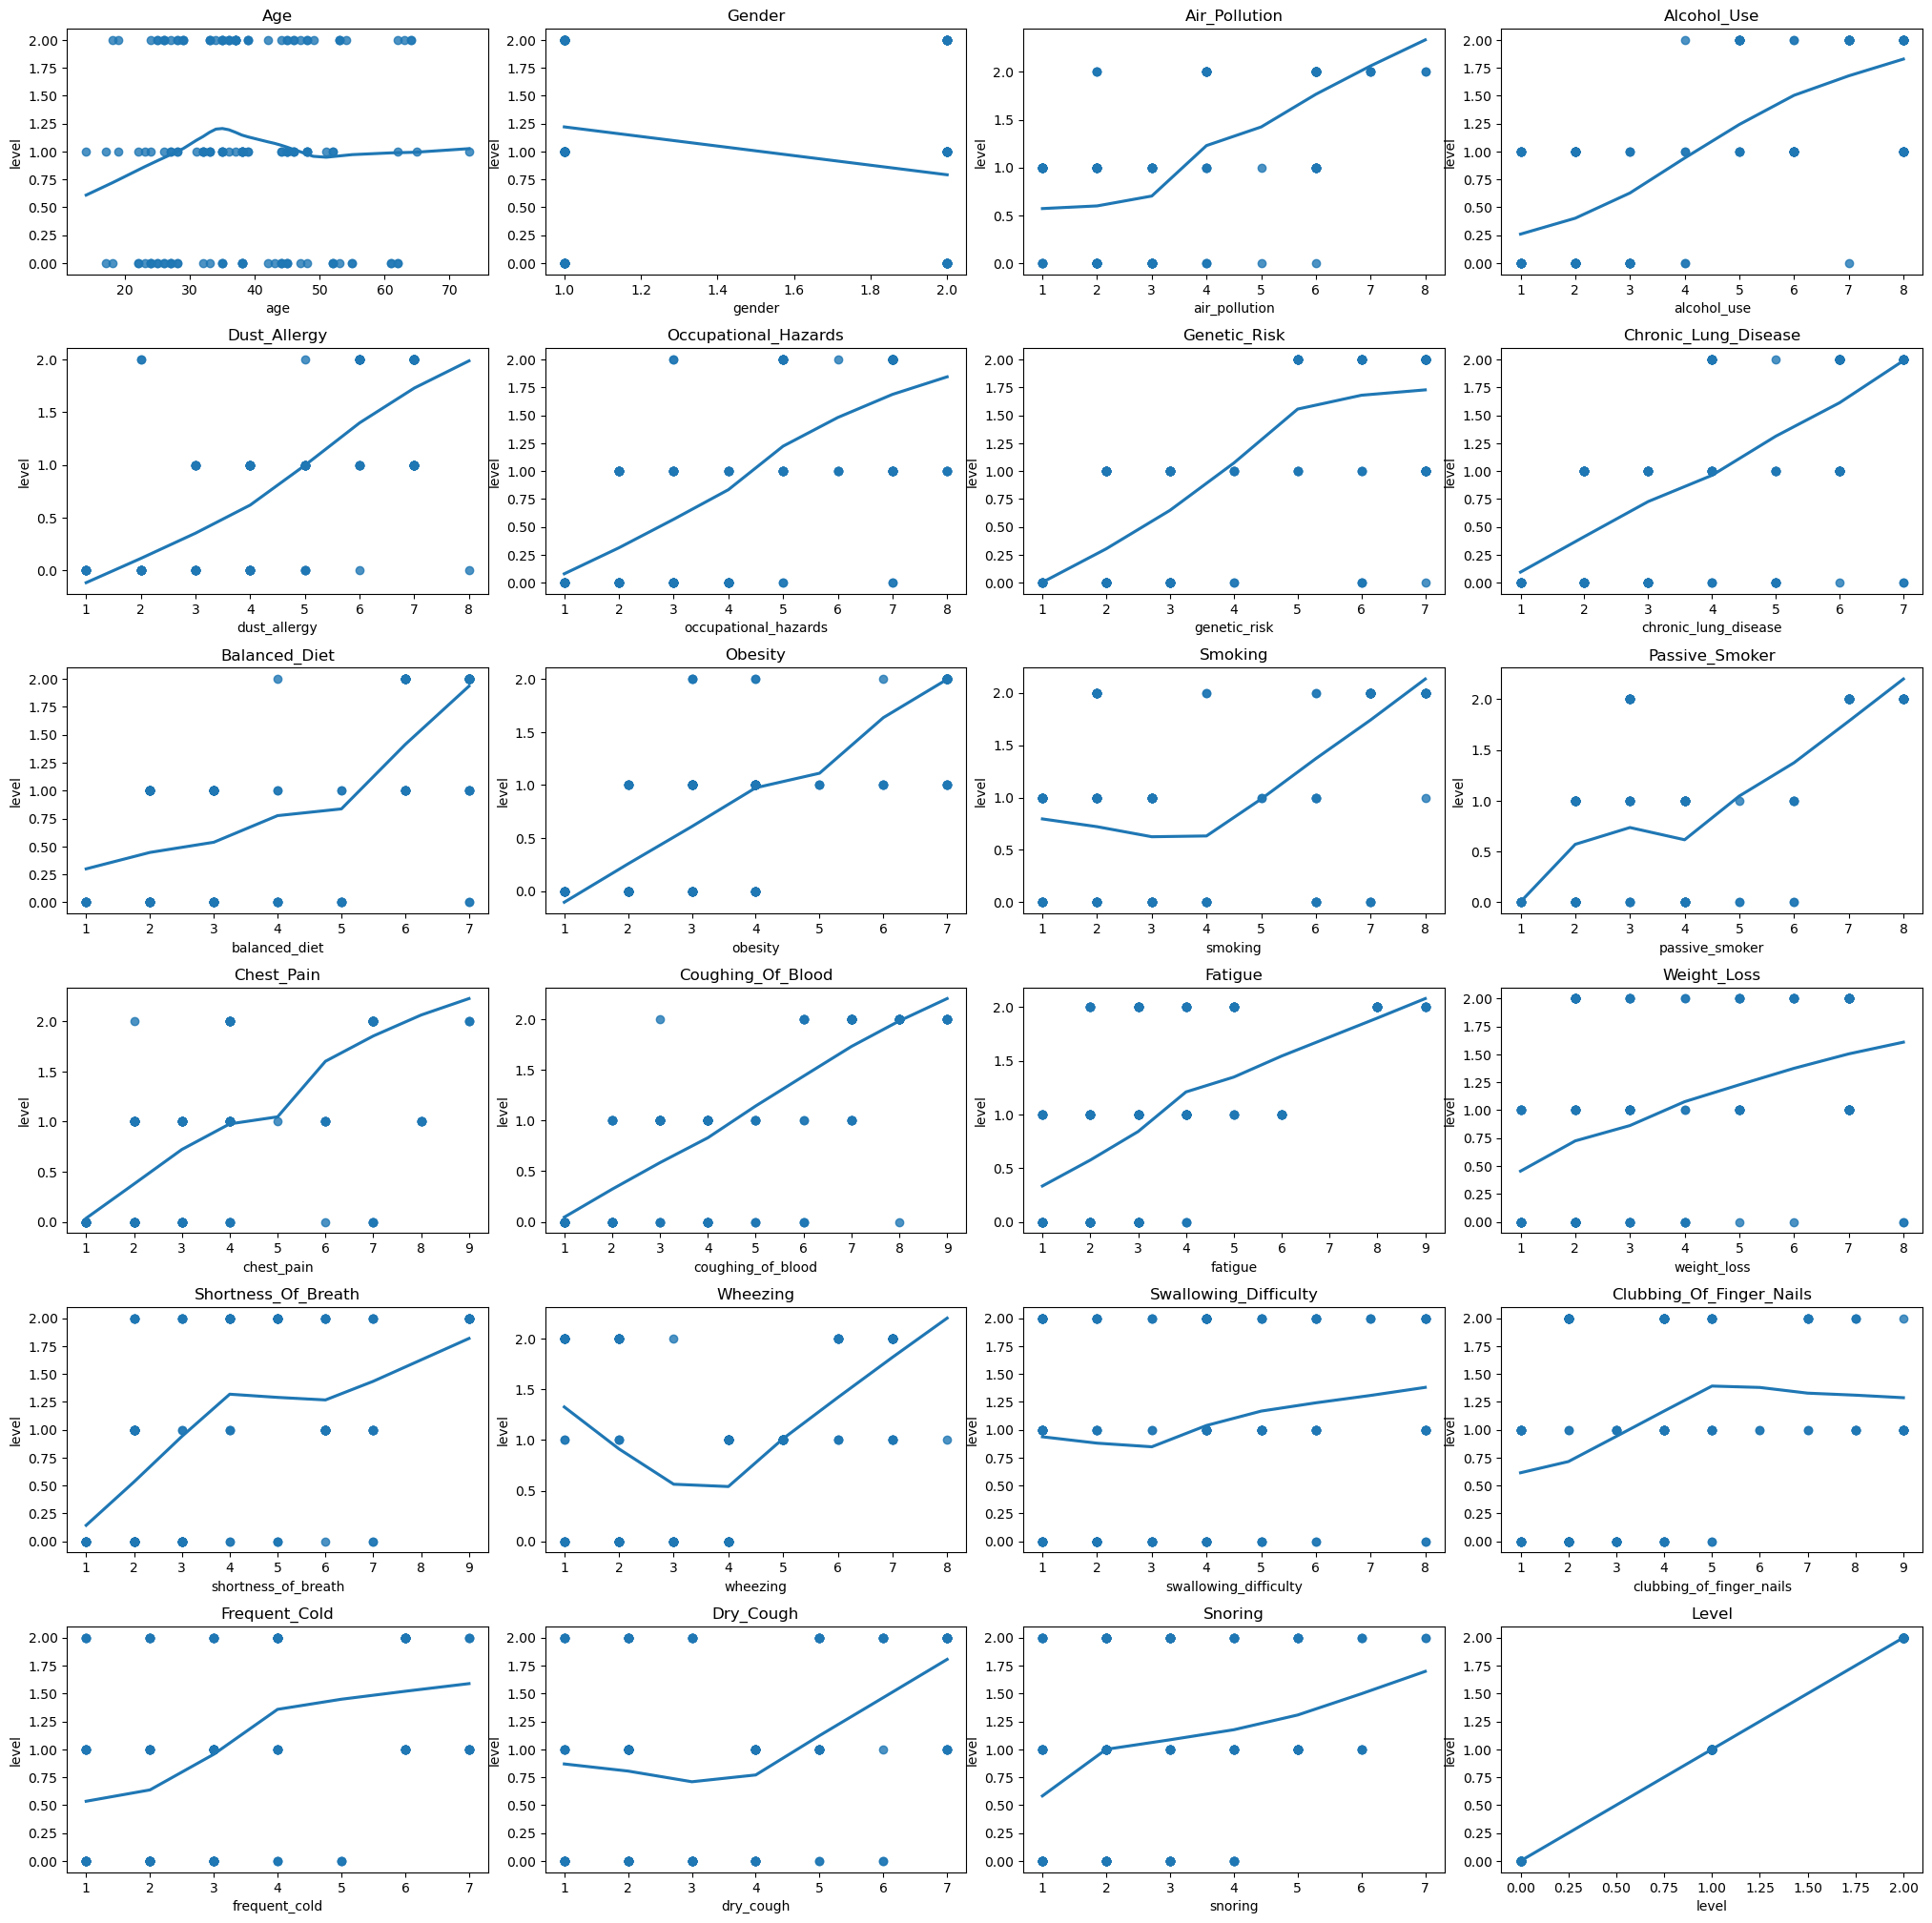

In [190]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    sns.regplot(x=col, y='level', data=df, lowess=True, ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
plt.show()

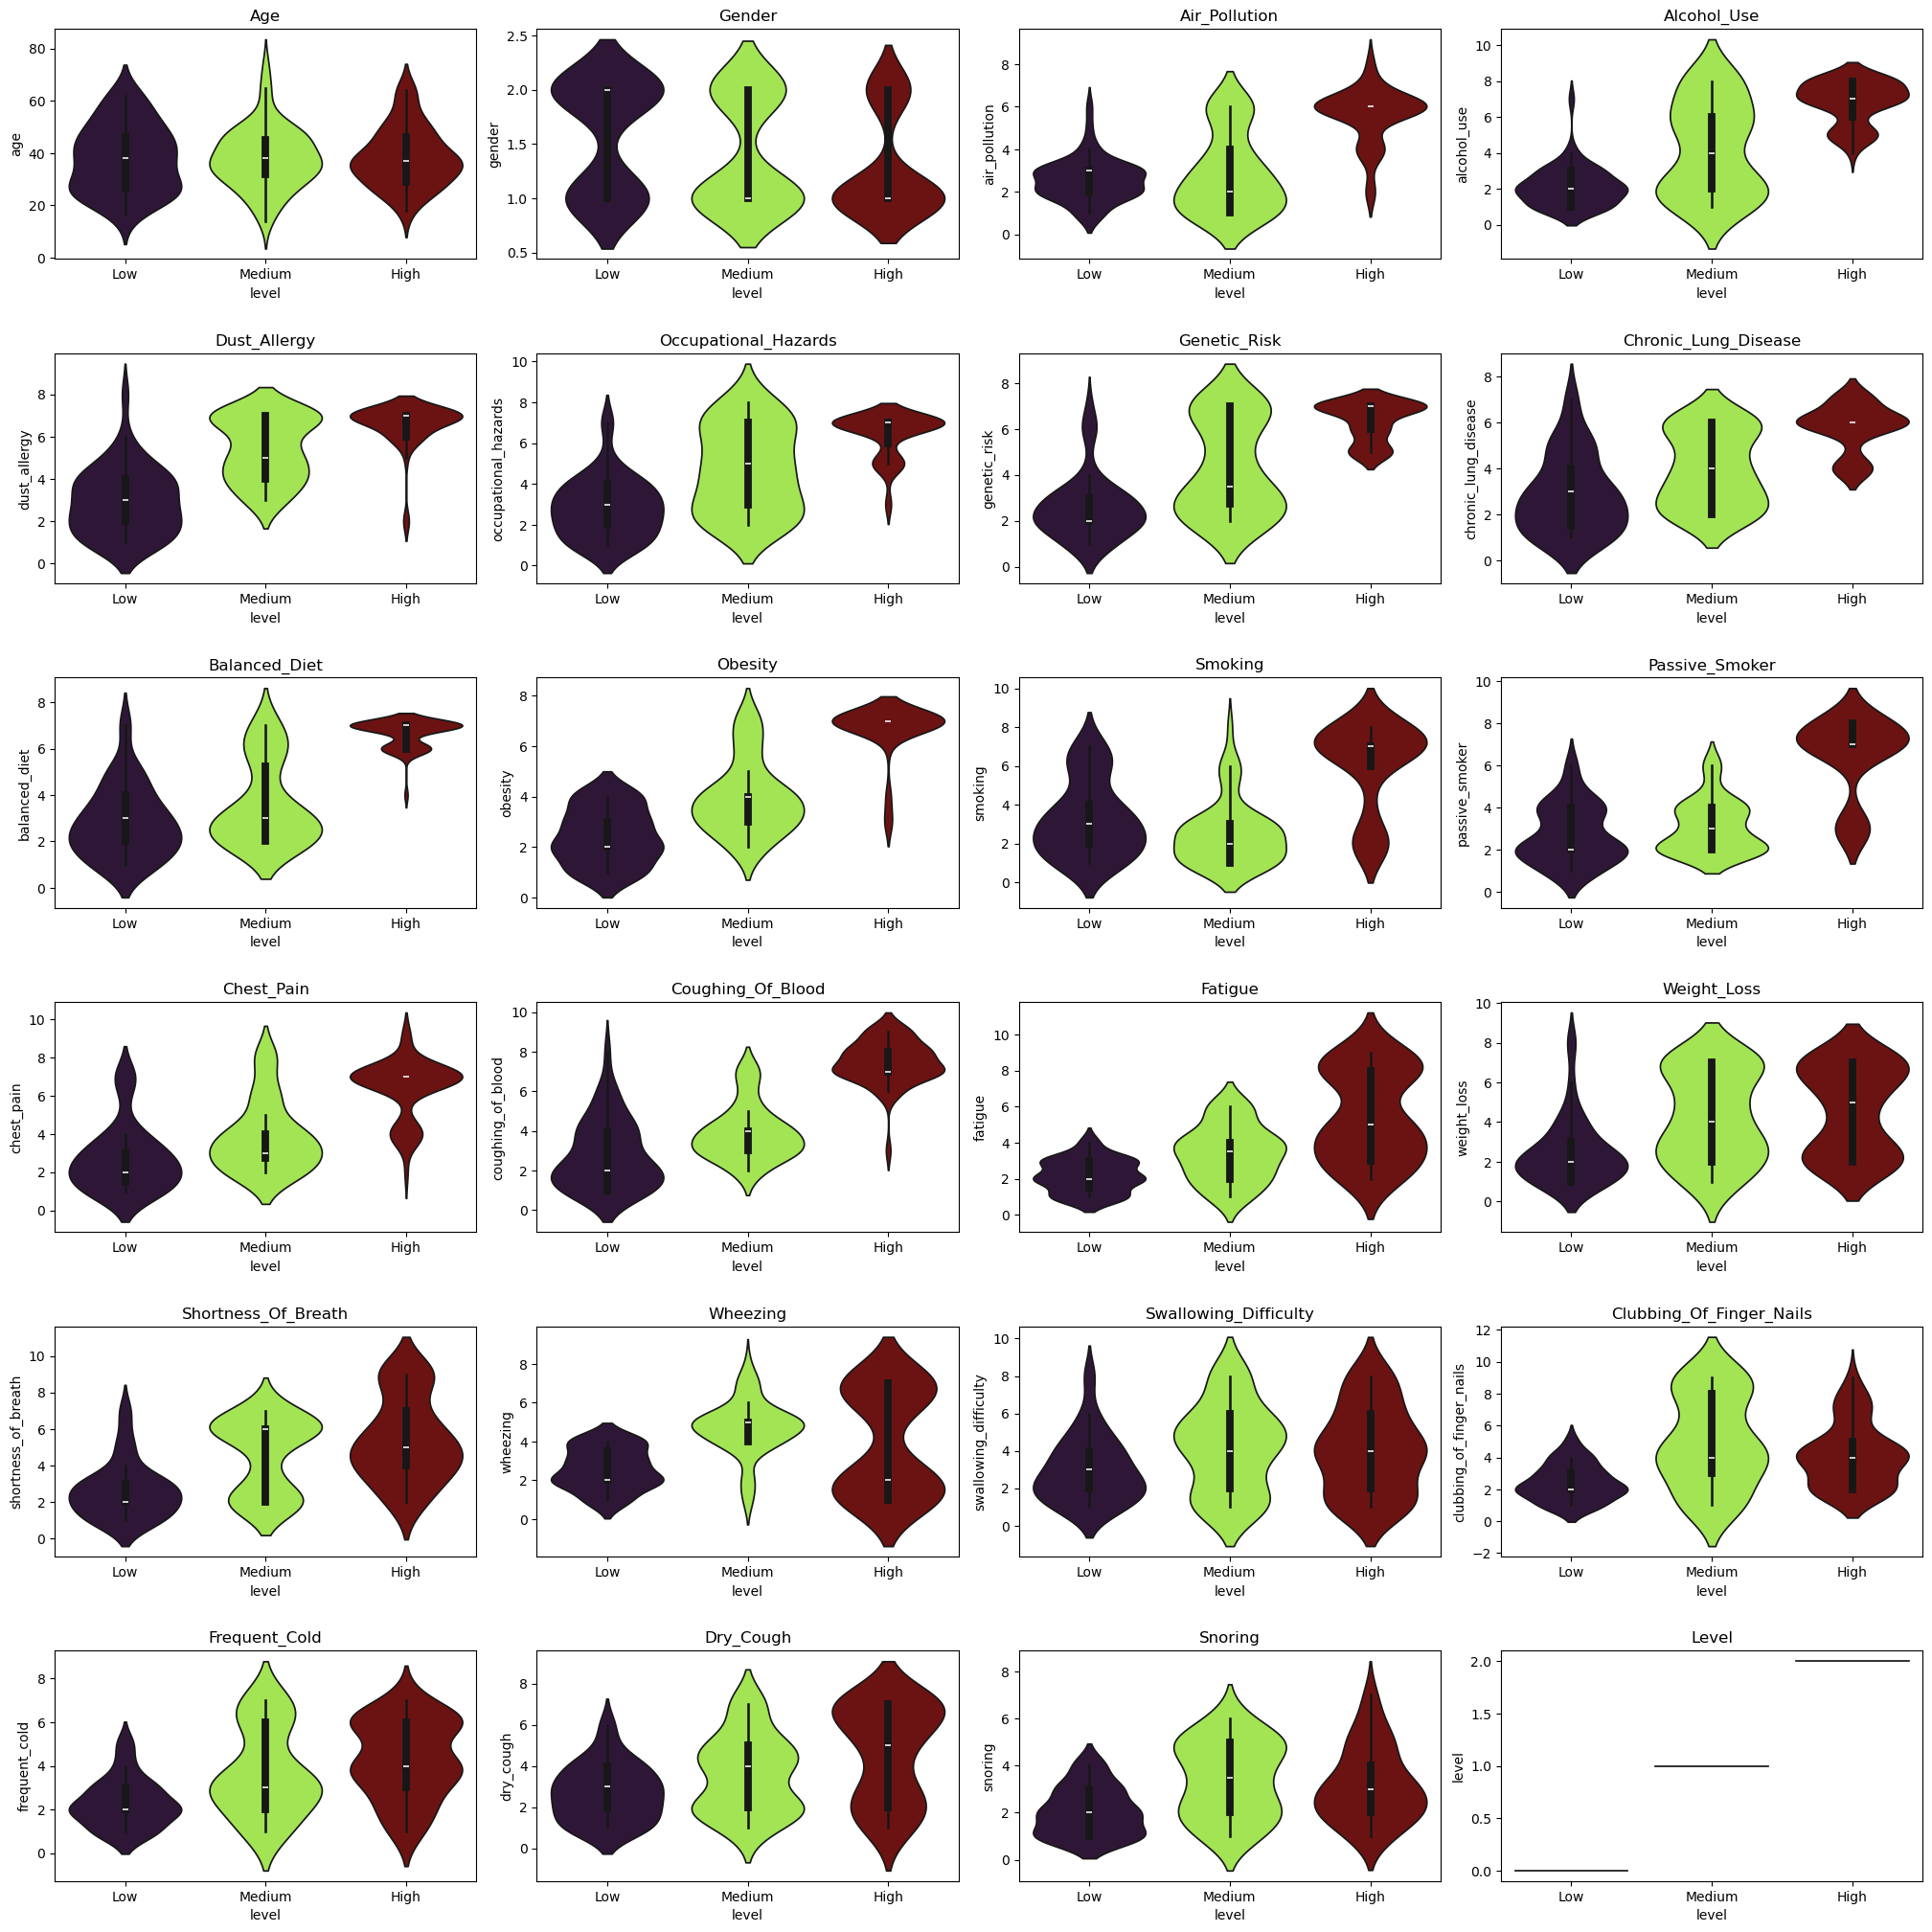

In [191]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
                   y=col, 
                   data=df, 
                   hue='level',  # Add this
                   palette='turbo', 
                   legend=False,  # Add this to avoid duplicate legends
                   ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
plt.show()

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (106, 23) and X Testing (46, 23)
Shapes - Y Training: (106,) and Y Testing (46,)

Training output counts
level
0    37
1    36
2    33
Name: count, dtype: int64


### **K-Nearest Neighbors (KNN)**

**Overview:**\
K-Nearest Neighbors (KNN) is a simple yet powerful classification algorithm that predicts the class of a data point based on the majority class of its *K* closest neighbors in the feature space. It operates on the principle that similar data points tend to belong to the same class.

**Algorithm:**

1.  **Distance Metric:** Computes the similarity between data points using a distance measure (commonly Euclidean distance).

2.  **Nearest Neighbors Selection:** Identifies the *K* training samples closest to the query point.

3.  **Majority Voting:** Assigns the class label that appears most frequently among the selected neighbors.

**Key Parameters:**

-   **n_neighbors (K):** The number of neighbors to consider. A smaller *K* leads to a more complex decision boundary, while a larger *K* smooths predictions.

-   **weights:**

    -   `'uniform'`: All neighbors contribute equally.

    -   `'distance'`: Closer neighbors have a greater influence.

-   **algorithm:** Method used to compute nearest neighbors (e.g., `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'`).

-   **leaf_size:** Affects the efficiency of tree-based algorithms (`BallTree` or `KDTree`). Smaller values increase precision but may slow down queries.

-   **p:** Power parameter for the Minkowski distance:

    -   `p=1`: Manhattan distance (L1).

    -   `p=2`: Euclidean distance (L2).

-   **metric:** Distance metric (e.g., `'minkowski'`, `'euclidean'`, `'manhattan'`, `'cosine'`).

-   **metric_params:** Additional arguments for custom distance metrics.

-   **n_jobs:** Number of CPU cores used for parallel computation (`-1` utilizes all available cores).

In [197]:
# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X_train, y_train)

# Predictions using Naive Bayes
knn_pred = knn_model.predict(X_test)

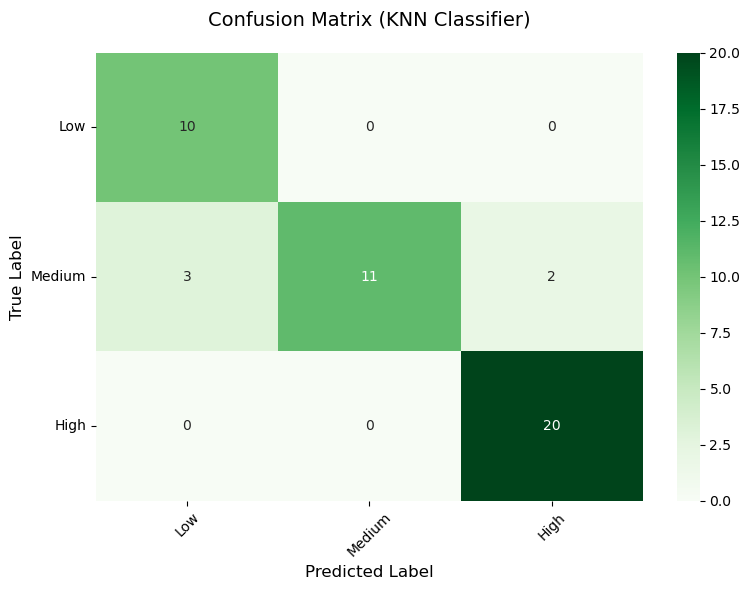


                 KNN Classification Report                  
              precision    recall  f1-score   support

         Low      0.769     1.000     0.870        10
      Medium      1.000     0.688     0.815        16
        High      0.909     1.000     0.952        20

    accuracy                          0.891        46
   macro avg      0.893     0.896     0.879        46
weighted avg      0.910     0.891     0.887        46


Model Accuracy: 0.891


In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_confusion_matrix(y_true, y_pred, class_names, title='Confusion Matrix', cmap='Greens'):
    """
    Plots a styled confusion matrix with annotations.
    
    Args:
        y_true: True labels
        y_pred: Predicted labels
        class_names: List of class names
        title: Title for the plot
        cmap: Color map
    """
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create figure
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                xticklabels=class_names, yticklabels=class_names)
    
    plt.title(f'Confusion Matrix {title}', fontsize=14, pad=20)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Initialize the accuracy dictionary if it doesn't exist
if 'ml_accuracies' not in globals():
    ml_accuracies = {}

# Plot confusion matrix
plot_confusion_matrix(y_test, knn_pred, 
                     class_names=['Low', 'Medium', 'High'], 
                     title='(KNN Classifier)',
                     cmap='Greens')

# Calculate and store accuracy
ml_accuracies['KNN'] = accuracy_score(y_test, knn_pred)

# Print detailed classification report
print("\n" + "="*60)
print("KNN Classification Report".center(60))
print("="*60)
print(classification_report(y_test, knn_pred, 
                           target_names=['Low', 'Medium', 'High'],
                           digits=3))
print("="*60)

# Display stored accuracy
print(f"\nModel Accuracy: {ml_accuracies['KNN']:.3f}")

In [201]:
print("=== Data Validation ===")
print(f"Total samples: {len(X)}")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("\nClass distribution in original data:\n", y.value_counts())
print("\nClass distribution in training set:\n", y_train.value_counts())
print("\nClass distribution in test set:\n", y_test.value_counts())

# Check for duplicate samples
print(f"\nDuplicate rows in training: {X_train.duplicated().sum()}")
print(f"Duplicate rows in test: {X_test.duplicated().sum()}")
print(f"Train samples in test: {sum([x in X_train.index for x in X_test.index])}")

=== Data Validation ===
Total samples: 152
Train shape: (106, 23), Test shape: (46, 23)

Class distribution in original data:
 level
2    53
1    52
0    47
Name: count, dtype: int64

Class distribution in training set:
 level
0    37
1    36
2    33
Name: count, dtype: int64

Class distribution in test set:
 level
2    20
1    16
0    10
Name: count, dtype: int64

Duplicate rows in training: 0
Duplicate rows in test: 0
Train samples in test: 0


In [203]:
from sklearn.model_selection import cross_val_score

print("\n=== Model Validation ===")
# Cross-validation on training data
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
print(f"Cross-val scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Compare with dummy classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
print(f"\nDummy classifier accuracy: {dummy.score(X_test, y_test):.3f}")


=== Model Validation ===
Cross-val scores: [0.90909091 0.85714286 0.80952381 0.76190476 0.9047619 ]
Mean CV accuracy: 0.848 ± 0.056

Dummy classifier accuracy: 0.217



=== Visualization ===


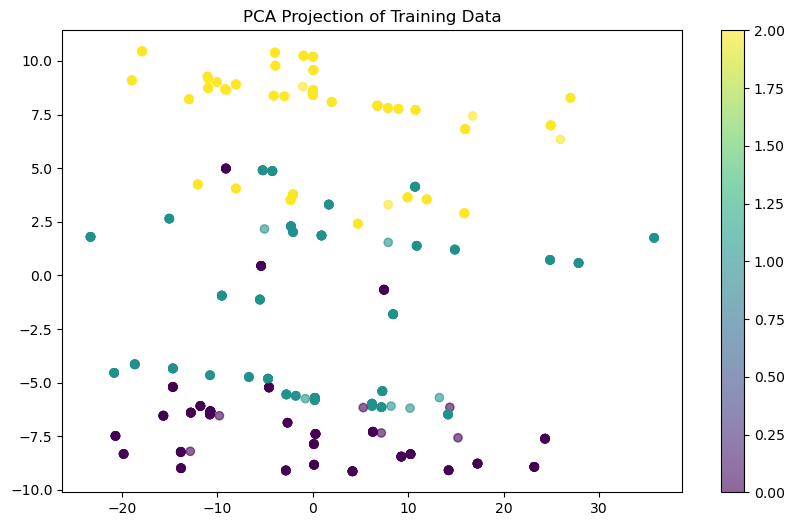

In [122]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print("\n=== Visualization ===")
# PCA projection for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='viridis', alpha=0.6)
plt.title("PCA Projection of Training Data")
plt.colorbar()
plt.show()

In [207]:
from joblib import dump

# Save the model to a file
dump(knn_model, 'lcp_model.joblib') 

# Later you can load it with:
# from joblib import load
# knn_model = load('knn_model.joblib')

['lcp_model.joblib']